In [77]:
import pandas as pd
from pandas import merge
import numpy as np
from matplotlib import pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [78]:
import glob,os

files = glob.glob('data/*.csv')
print(files)

['data\\t_TC_112_1.csv', 'data\\t_TC_112_2.csv', 'data\\t_TC_114_1.csv', 'data\\t_TC_115_1.csv', 'data\\t_TC_115_2.csv', 'data\\t_TC_115_3.csv', 'data\\t_TC_117_2.csv', 'data\\t_TC_117_3.csv', 'data\\t_TC_162A_1.csv', 'data\\t_TC_162A_2.csv', 'data\\t_TC_162A_3.csv', 'data\\t_TC_162A_4.csv', 'data\\t_TC_162A_5.csv', 'data\\t_TC_162A_6.csv', 'data\\t_TC_162B_1.csv', 'data\\t_TC_162B_2.csv', 'data\\t_TC_162B_3.csv', 'data\\t_TC_162B_4.csv', 'data\\t_TC_162B_5.csv', 'data\\t_TC_162B_6.csv', 'data\\t_TC_303_1.csv', 'data\\t_TC_303_2.csv', 'data\\t_TC_304_1.csv', 'data\\t_TC_304_3.csv', 'data\\t_TC_304_4.csv', 'data\\t_TC_305_1.csv', 'data\\t_TC_305_2.csv', 'data\\t_TC_305_3.csv', 'data\\t_TC_305_4.csv', 'data\\t_TC_306_1.csv', 'data\\t_TC_306_2.csv', 'data\\t_TC_306_3.csv', 'data\\t_TC_306_4.csv', 'data\\t_TC_309_1.csv', 'data\\t_TC_309_10.csv', 'data\\t_TC_309_2.csv', 'data\\t_TC_309_3.csv', 'data\\t_TC_309_4.csv', 'data\\t_TC_309_5.csv', 'data\\t_TC_309_6.csv', 'data\\t_TC_309_7.csv', 'd

In [79]:
df = pd.concat([pd.read_csv(f).assign(f_name=os.path.basename(f).split('t_')[1].split('.')[0]) for f in files])
print(df)

       Unnamed: 0  time  current  voltage  name       f_name
0               1   434     8403     2059     1     TC_112_1
1               2   453     8380     2030     2     TC_112_1
2               3   453     8390     2041     3     TC_112_1
3               4   451     8382     2003     4     TC_112_1
4               5   288     8154     1524     5     TC_112_1
5               6   291     8157     1551     6     TC_112_1
6               7   286     8245     1541     7     TC_112_1
7               8   583     8480     2541     8     TC_112_1
8               9   448     8384     1857     9     TC_112_1
9              10   442     8383     1989    10     TC_112_1
10             11   453     8396     1972    11     TC_112_1
11             12   441     8392     1980    12     TC_112_1
12             13   447     8401     1960    13     TC_112_1
13             14   311     8240     1972    14     TC_112_1
14             15   363     7770     1640    15     TC_112_1
15             16   369 

In [80]:
df.head()

Unnamed: 0  time  current  voltage  name    f_name
0           1   434     8403     2059     1  TC_112_1
1           2   453     8380     2030     2  TC_112_1
2           3   453     8390     2041     3  TC_112_1
3           4   451     8382     2003     4  TC_112_1
4           5   288     8154     1524     5  TC_112_1

In [81]:
df.columns

Index(['Unnamed: 0', 'time', 'current', 'voltage', 'name', 'f_name'], dtype='object')

In [82]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [83]:
df.head()

time  current  voltage  name    f_name
0   434     8403     2059     1  TC_112_1
1   453     8380     2030     2  TC_112_1
2   453     8390     2041     3  TC_112_1
3   451     8382     2003     4  TC_112_1
4   288     8154     1524     5  TC_112_1

In [84]:
df = df.rename(columns={'time':'weld_time','name':'weld_point','f_name':'robot_name'})
df.head()

weld_time  current  voltage  weld_point robot_name
0        434     8403     2059           1   TC_112_1
1        453     8380     2030           2   TC_112_1
2        453     8390     2041           3   TC_112_1
3        451     8382     2003           4   TC_112_1
4        288     8154     1524           5   TC_112_1

In [85]:
df.shape

(10022802, 5)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10022802 entries, 0 to 91784
Data columns (total 5 columns):
weld_time     int64
current       int64
voltage       int64
weld_point    int64
robot_name    object
dtypes: int64(4), object(1)
memory usage: 458.8+ MB


In [87]:
df.isnull().sum()

weld_time     0
current       0
voltage       0
weld_point    0
robot_name    0
dtype: int64

In [88]:
allfiles = glob.glob('data/*.csv')
filelist = []
for i in range(len(allfiles)):
    filelist1 = os.path.basename(allfiles[i]).split('.')[0]
    filelist1 = filelist1.split('t_')[1]
    filelist.append(filelist1)    

In [89]:
filelist[:10]

['TC_112_1',
 'TC_112_2',
 'TC_114_1',
 'TC_115_1',
 'TC_115_2',
 'TC_115_3',
 'TC_117_2',
 'TC_117_3',
 'TC_162A_1',
 'TC_162A_2']

In [90]:
type(filelist[0])

str

In [91]:
for f in filelist:
    globals()['df_{}'.format(f)] = df[df['robot_name'] == f]
    globals()['df_{}'.format(f)] = globals()['df_{}'.format(f)][globals()['df_{}'.format(f)]['current']!=0]    

In [92]:
df_TC_112_1[df_TC_112_1['current']==0]

Empty DataFrame
Columns: [weld_time, current, voltage, weld_point, robot_name]
Index: []

In [93]:
df_TC_112_1.head()

weld_time  current  voltage  weld_point robot_name
0        434     8403     2059           1   TC_112_1
1        453     8380     2030           2   TC_112_1
2        453     8390     2041           3   TC_112_1
3        451     8382     2003           4   TC_112_1
4        288     8154     1524           5   TC_112_1

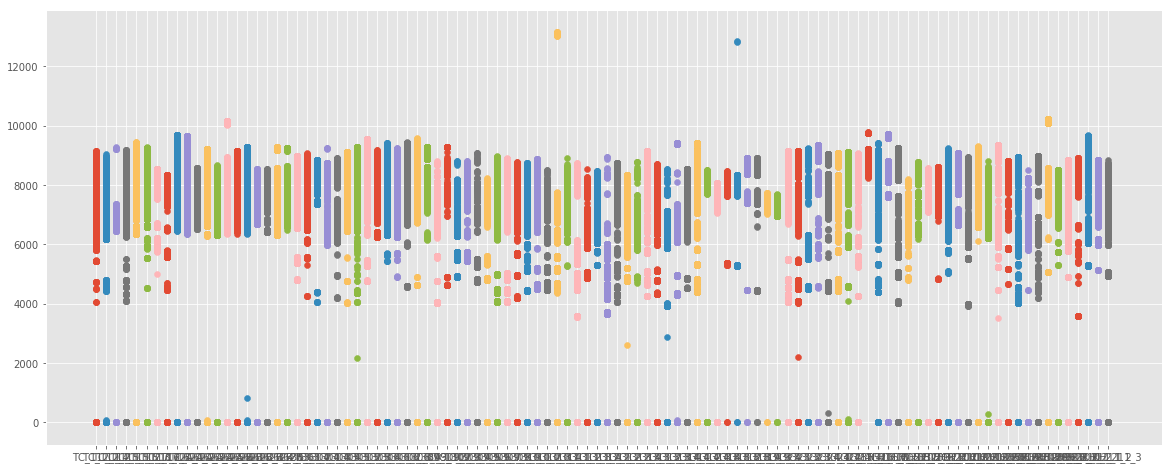

In [111]:
plt.figure(figsize=(20,8))

for f in filelist:
    globals()['df_{}'.format(f)] = df[df['robot_name'] == f]
    plt.scatter(globals()['df_{}'.format(f)]['robot_name'],globals()['df_{}'.format(f)]['current'])

In [95]:
table = df.pivot_table(index = ['weld_point'], columns = ['robot_name'], values = 'current')

In [96]:
table.head()

robot_name     TC_112_1     TC_112_2     TC_114_1     TC_115_1     TC_115_2  \
weld_point                                                                    
0              0.000000     0.000000     0.000000     0.000000     0.000000   
1           7582.667049  7497.451882  6704.735211  8104.313025  8023.128772   
2           7581.613839  7515.232404  6736.025366  8060.785989  7968.113684   
3           7590.351708  7510.337547  7022.041173  7573.302977  7941.183860   
4           7518.064599  7413.352772          NaN  7587.230554  7721.710674   

robot_name     TC_115_3     TC_117_2     TC_117_3    TC_162A_1    TC_162A_2  \
weld_point                                                                    
0              0.000000     0.000000     0.000000     0.000000     0.000000   
1           8481.165319  7817.810369  7764.736842  8327.126910  8448.031336   
2           8177.599806  8087.615636  7960.138269  8340.265570  7949.645515   
3           8192.153846  8085.029802  7920.722792  7894.130826  9030.025460   
4           8157.582541  7839.295571  7935.627788  7896.016843  8627.002350   

robot_name  ...  TC_RH_205_3  TC_RH_208_2  TC_RH_208_3  TC_RH_209_2  \
weld_point  ...                                                       
0           ...     0.000000     0.000000     0.000000     0.000000   
1           ...  7771.453878  7052.886419  6812.949153  8172.211825   
2           ...  6448.818163  7053.784446  7801.171945  8062.250357   
3           ...  6428.447755  7633.837518  7778.994421  7979.161876   
4           ...  6235.600408  7560.256175  7771.063825  7733.190214   

robot_name  TC_RH_209_2_1  TC_RH_210_1  TC_RH_210_2  TC_RH_211_1  TC_RH_211_2  \
weld_point                                                                      
0                0.000000     0.000000     0.000000     0.000000     0.000000   
1             7763.547979  7514.386419  8428.309951  7819.042193  7798.267686   
2             8226.938342  7558.431892  8348.112357  7793.551773  7774.896840   
3             8224.222177  6930.751835  8317.504486  8163.299225  7721.918230   
4             8218.103533  6920.837276  8256.681892  8081.766205  7365.104405   

robot_name  TC_RH_211_3  
weld_point               
0              0.000000  
1           7665.467486  
2           7633.371956  
3           7728.655474  
4           7818.456609  

[5 rows x 102 columns]

In [97]:
# fill NA values with 0 and reset the index to robot name
table = table.fillna(0).reset_index()

In [98]:
table.head()

robot_name  weld_point     TC_112_1     TC_112_2     TC_114_1     TC_115_1  \
0                    0     0.000000     0.000000     0.000000     0.000000   
1                    1  7582.667049  7497.451882  6704.735211  8104.313025   
2                    2  7581.613839  7515.232404  6736.025366  8060.785989   
3                    3  7590.351708  7510.337547  7022.041173  7573.302977   
4                    4  7518.064599  7413.352772     0.000000  7587.230554   

robot_name     TC_115_2     TC_115_3     TC_117_2     TC_117_3    TC_162A_1  \
0              0.000000     0.000000     0.000000     0.000000     0.000000   
1           8023.128772  8481.165319  7817.810369  7764.736842  8327.126910   
2           7968.113684  8177.599806  8087.615636  7960.138269  8340.265570   
3           7941.183860  8192.153846  8085.029802  7920.722792  7894.130826   
4           7721.710674  8157.582541  7839.295571  7935.627788  7896.016843   

robot_name  ...  TC_RH_205_3  TC_RH_208_2  TC_RH_208_3  TC_RH_209_2  \
0           ...     0.000000     0.000000     0.000000     0.000000   
1           ...  7771.453878  7052.886419  6812.949153  8172.211825   
2           ...  6448.818163  7053.784446  7801.171945  8062.250357   
3           ...  6428.447755  7633.837518  7778.994421  7979.161876   
4           ...  6235.600408  7560.256175  7771.063825  7733.190214   

robot_name  TC_RH_209_2_1  TC_RH_210_1  TC_RH_210_2  TC_RH_211_1  TC_RH_211_2  \
0                0.000000     0.000000     0.000000     0.000000     0.000000   
1             7763.547979  7514.386419  8428.309951  7819.042193  7798.267686   
2             8226.938342  7558.431892  8348.112357  7793.551773  7774.896840   
3             8224.222177  6930.751835  8317.504486  8163.299225  7721.918230   
4             8218.103533  6920.837276  8256.681892  8081.766205  7365.104405   

robot_name  TC_RH_211_3  
0              0.000000  
1           7665.467486  
2           7633.371956  
3           7728.655474  
4           7818.456609  

[5 rows x 103 columns]

In [99]:
table.columns

Index(['weld_point', 'TC_112_1', 'TC_112_2', 'TC_114_1', 'TC_115_1',
       'TC_115_2', 'TC_115_3', 'TC_117_2', 'TC_117_3', 'TC_162A_1',
       ...
       'TC_RH_205_3', 'TC_RH_208_2', 'TC_RH_208_3', 'TC_RH_209_2',
       'TC_RH_209_2_1', 'TC_RH_210_1', 'TC_RH_210_2', 'TC_RH_211_1',
       'TC_RH_211_2', 'TC_RH_211_3'],
      dtype='object', name='robot_name', length=103)

In [100]:
table.shape

(46, 103)

In [101]:
# extracting the columns(102 columns)
cols = table.columns[1:]

In [102]:
cols

Index(['TC_112_1', 'TC_112_2', 'TC_114_1', 'TC_115_1', 'TC_115_2', 'TC_115_3',
       'TC_117_2', 'TC_117_3', 'TC_162A_1', 'TC_162A_2',
       ...
       'TC_RH_205_3', 'TC_RH_208_2', 'TC_RH_208_3', 'TC_RH_209_2',
       'TC_RH_209_2_1', 'TC_RH_210_1', 'TC_RH_210_2', 'TC_RH_211_1',
       'TC_RH_211_2', 'TC_RH_211_3'],
      dtype='object', name='robot_name', length=102)

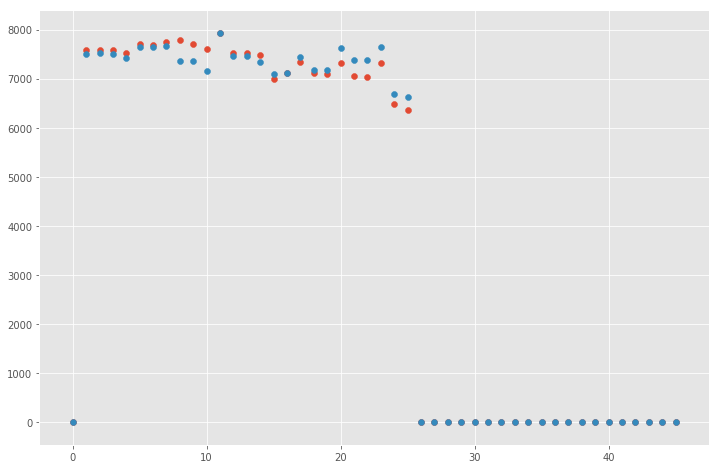

In [104]:
plt.figure(figsize=(12,8))
plt.scatter(table['weld_point'],table[cols[0]])
plt.scatter(table['weld_point'],table[cols[1]])
# plt.scatter(table['weld_point'],table[cols[2]])
# plt.scatter(table['weld_point'],table[cols[3]])

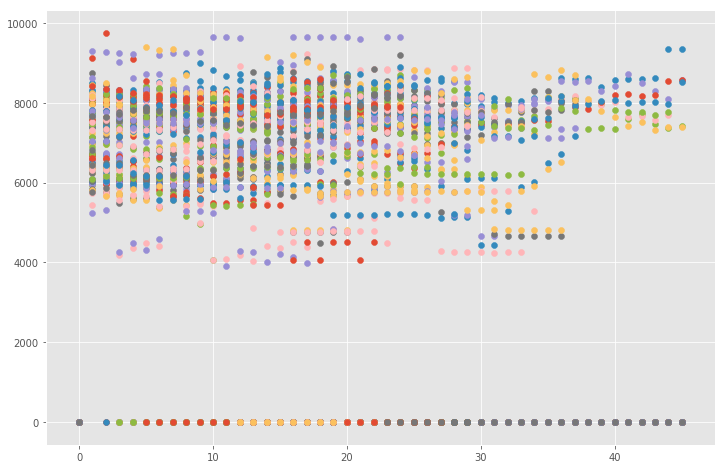

In [105]:
plt.figure(figsize=(12,8))

for i in range(len(cols)):
    plt.scatter(table['weld_point'],table[cols[i]])

# K-means clustering

In [117]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [118]:
import plotly 
print('plotly version:',plotly.__version__)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot
import plotly.plotly as py

import cufflinks as cf
print('cufflinks version: ',cf.__version__)

# run at the start of every ipython notebook to use plotly.offline
# this injects the plotly.js source files into the notebook
init_notebook_mode(connected=True)
cf.go_offline()

plotly version: 3.10.0
cufflinks version:  0.16


In [144]:
cols = df.columns

In [145]:
cluster = KMeans(n_clusters=5)

In [146]:
df['cluster'] = cluster.fit_predict(df[df.columns[1:3]])

In [147]:
df.head()

index  weld_time  current  voltage  weld_point robot_name  cluster  \
0      0        434     8403     2059           1   TC_112_1        0   
1      1        453     8380     2030           2   TC_112_1        0   
2      2        453     8390     2041           3   TC_112_1        0   
3      3        451     8382     2003           4   TC_112_1        0   
4      4        288     8154     1524           5   TC_112_1        4   

             x           y  
0 -1345.508738 -294.349924  
1 -1315.503717 -316.398086  
2 -1327.881325 -308.166966  
3 -1310.915634 -343.113689  
4  -978.413636 -756.085504

In [148]:
df.shape

(10022802, 9)

In [149]:
pca = PCA(n_components=2)

In [150]:
pca.fit_transform(df[cols[1:3]])

array([[-1376.98218331,    87.31225423],
       [-1353.33677435,   105.50276485],
       [-1363.33075286,   105.84974247],
       ...,
       [  511.34561572,   -51.29195502],
       [ -544.48326073,   -85.67776112],
       [ -574.46519627,   -84.63682825]])

In [151]:
pca.fit_transform(df[cols[1:3]]).shape

(10022802, 2)

In [152]:
# principal component separation to create a 2-dimensional picture
pca = PCA(n_components=2)
df['x'] = pca.fit_transform(df[cols[1:3]])[:,0]
df['y'] = pca.fit_transform(df[cols[1:3]])[:,1]
df = df.reset_index()

In [153]:
df.head()

level_0  index  weld_time  current  voltage  weld_point robot_name  \
0        0      0        434     8403     2059           1   TC_112_1   
1        1      1        453     8380     2030           2   TC_112_1   
2        2      2        453     8390     2041           3   TC_112_1   
3        3      3        451     8382     2003           4   TC_112_1   
4        4      4        288     8154     1524           5   TC_112_1   

   cluster            x           y  
0        0 -1376.982183   87.312254  
1        0 -1353.336774  105.502765  
2        0 -1363.330753  105.849742  
3        0 -1355.404966  103.573365  
4        4 -1133.197991  -67.239575

In [154]:
df['cluster'].unique()

array([0, 4, 3, 2, 1], dtype=int64)

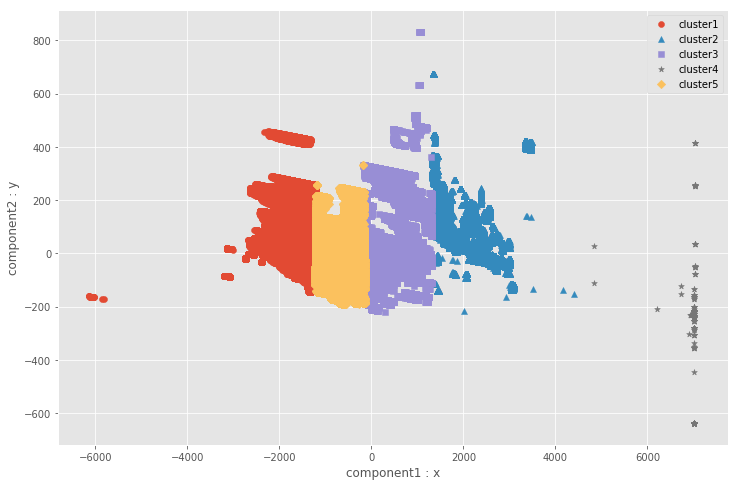

In [157]:
plt.figure(figsize=(12,8))

plt.scatter(df[df.cluster == 0]['x'],
            df[df.cluster == 0]['y'],marker = 'o')
plt.scatter(df[df.cluster == 1]['x'],
            df[df.cluster == 1]['y'],marker = '^')
plt.scatter(df[df.cluster == 2]['x'],
            df[df.cluster == 2]['y'],marker = 's')
plt.scatter(df[df.cluster == 3]['x'],
            df[df.cluster == 3]['y'],marker = '*')
plt.scatter(df[df.cluster == 4]['x'],
            df[df.cluster == 4]['y'],marker = 'D')

plt.xlabel('component1 : x')
plt.ylabel('component2 : y')
plt.legend(['cluster1','cluster2','cluster3','cluster4','cluster5'])
plt.show()

In [156]:
trace0 = go.Scatter(x = df[df.cluster == 0]['x'],
                    y = df[df.cluster == 0]['y'],
                    name = 'Cluster1',
                    mode = 'markers',
                    marker = dict(size = 10,
                                  color = 'rgba(15,152,152,0.5)',
                                  line = dict(width = 1, color = 'rgba(0,0,0)')))
trace1 = go.Scatter(x = df[df.cluster == 1]['x'],
                    y = df[df.cluster == 1]['y'],
                    name = 'Cluster2',
                    mode = 'markers',
                    marker = dict(size = 10,
                                  color = 'rgba(180,18,180,0.5)',
                                  line = dict(width = 1, color = 'rgba(0,0,0)')))
trace2 = go.Scatter(x = df[df.cluster == 2]['x'],
                    y = df[df.cluster == 2]['y'],
                    name = 'Cluster3',
                    mode = 'markers',
                    marker = dict(size = 10,
                                  color = 'rgba(132,132,132,0.8)',
                                  line = dict(width = 1, color = 'rgba(0,0,0)')))
trace3 = go.Scatter(x = df[df.cluster == 3]['x'],
                    y = df[df.cluster == 3]['y'],
                    name = 'Cluster3',
                    mode = 'markers',
                    marker = dict(size = 10,
                                  color = 'rgba(122,122,12,0.8)',
                                  line = dict(width = 1, color = 'rgba(0,0,0)')))
trace4 = go.Scatter(x = df[df.cluster == 4]['x'],
                    y = df[df.cluster == 4]['y'],
                    name = 'Cluster3',
                    mode = 'markers',
                    marker = dict(size = 10,
                                  color = 'rgba(230,20,30,0.5)',
                                  line = dict(width = 1, color = 'rgba(0,0,0)')))

data = [trace0,trace1,trace2,trace3,trace4]
plot(data)

'temp-plot.html'

In [96]:
globals()['df_{}'.format(filelist[0])]['weld_time'].head()

0    434
1    453
2    453
3    451
4    288
Name: weld_time, dtype: int64

In [97]:
len(filelist)

102

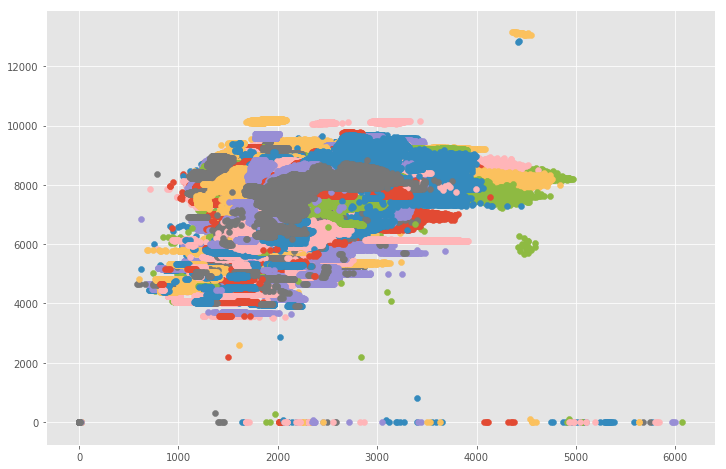

In [98]:
plt.figure(figsize=(12,8))

# plt.scatter(globals()['df_{}'.format(filelist[0])]['voltage'],
#             globals()['df_{}'.format(filelist[0])]['current'],marker='o')
# plt.scatter(globals()['df_{}'.format(filelist[1])]['voltage'],
#             globals()['df_{}'.format(filelist[1])]['current'],marker='o')
# plt.scatter(globals()['df_{}'.format(filelist[2])]['voltage'],
#             globals()['df_{}'.format(filelist[2])]['current'],marker='o')

for i in range(len(filelist)):
    plt.scatter(globals()['df_{}'.format(filelist[i])]['voltage'],
                globals()['df_{}'.format(filelist[i])]['current'],marker='o')

In [ ]:
plt.figure(figsize=(12,8))

# plt.scatter(globals()['df_{}'.format(filelist[0])]['voltage'],
#             globals()['df_{}'.format(filelist[0])]['current'],marker='o')
# plt.scatter(globals()['df_{}'.format(filelist[1])]['voltage'],
#             globals()['df_{}'.format(filelist[1])]['current'],marker='o')
# plt.scatter(globals()['df_{}'.format(filelist[2])]['voltage'],
#             globals()['df_{}'.format(filelist[2])]['current'],marker='o')

for i in range(len(filelist)):
    plt.scatter(globals()['df_{}'.format(filelist[i])]['current'],
                globals()['df_{}'.format(filelist[i])]['current'],marker='o')

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=globals()['df_{}'.format(filelist[0])],x='weld_point',y='current')

In [ ]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,15)

sns.boxplot(data=df_TC_112_1,x='weld_point',y='current',ax=ax1)
sns.boxplot(data=df_TC_112_2,x='weld_point',y='current',ax=ax2)
sns.boxplot(data=df_TC_114_1,x='weld_point',y='current',ax=ax3)
sns.boxplot(data=df_TC_115_1,x='weld_point',y='current',ax=ax4)

ax1.set(xlabel='weld_point',ylabel='current')
ax2.set(xlabel='weld_point',ylabel='current')
ax3.set(xlabel='weld_point',ylabel='current')
ax4.set(xlabel='weld_point',ylabel='current')

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_TC_112_1,x='weld_point',y='weld_time')

In [ ]:
TC_112_1 = pd.read_csv('t_TC_112_1.csv',index_col=False)
TC_112_2 = pd.read_csv('t_TC_112_2.csv',index_col=False)

TC_114_1 = pd.read_csv('t_TC_114_1.csv',index_col=False)

TC_115_1 = pd.read_csv('t_TC_115_1.csv',index_col=False)
TC_115_2 = pd.read_csv('t_TC_115_2.csv',index_col=False)
TC_115_3 = pd.read_csv('t_TC_115_3.csv',index_col=False)

TC_117_2 = pd.read_csv('t_TC_117_2.csv',index_col=False)
TC_117_3 = pd.read_csv('t_TC_117_3.csv',index_col=False)

TC_162A_1 = pd.read_csv('t_TC_162A_1.csv',index_col=False)
TC_162A_2 = pd.read_csv('t_TC_162A_2.csv',index_col=False)
TC_162A_3 = pd.read_csv('t_TC_162A_3.csv',index_col=False)
TC_162A_4 = pd.read_csv('t_TC_162A_4.csv',index_col=False)
TC_162A_5 = pd.read_csv('t_TC_162A_5.csv',index_col=False)
TC_162A_6 = pd.read_csv('t_TC_162A_6.csv',index_col=False)

TC_162B_1 = pd.read_csv('t_TC_162B_1.csv',index_col=False)
TC_162B_2 = pd.read_csv('t_TC_162B_2.csv',index_col=False)
TC_162B_3 = pd.read_csv('t_TC_162B_3.csv',index_col=False)
TC_162B_4 = pd.read_csv('t_TC_162B_4.csv',index_col=False)
TC_162B_5 = pd.read_csv('t_TC_162B_5.csv',index_col=False)
TC_162B_6 = pd.read_csv('t_TC_162B_6.csv',index_col=False)

TC_162A_6 = pd.read_csv('t_TC_162A_6.csv',index_col=False)
TC_162A_6 = pd.read_csv('t_TC_162A_6.csv',index_col=False)
TC_162A_6 = pd.read_csv('t_TC_162A_6.csv',index_col=False)
TC_162A_6 = pd.read_csv('t_TC_162A_6.csv',index_col=False)

TC_303_1 = pd.read_csv('t_TC_303_1.csv',index_col=False)
TC_303_2 = pd.read_csv('t_TC_303_2.csv',index_col=False)

TC_304_1 = pd.read_csv('t_TC_304_1.csv',index_col=False)
TC_304_3 = pd.read_csv('t_TC_304_3.csv',index_col=False)
TC_304_4 = pd.read_csv('t_TC_304_4.csv',index_col=False)

TC_305_1 = pd.read_csv('t_TC_305_1.csv',index_col=False)
TC_305_2 = pd.read_csv('t_TC_305_2.csv',index_col=False)
TC_305_3 = pd.read_csv('t_TC_305_3.csv',index_col=False)
TC_305_4 = pd.read_csv('t_TC_305_4.csv',index_col=False)

TC_306_1 = pd.read_csv('t_TC_306_1.csv',index_col=False)
TC_306_2 = pd.read_csv('t_TC_306_2.csv',index_col=False)
TC_306_3 = pd.read_csv('t_TC_306_3.csv',index_col=False)
TC_306_4 = pd.read_csv('t_TC_306_4.csv',index_col=False)

TC_309_1 = pd.read_csv('t_TC_309_1.csv',index_col=False)
TC_309_2 = pd.read_csv('t_TC_309_2.csv',index_col=False)
TC_309_3 = pd.read_csv('t_TC_309_3.csv',index_col=False)
TC_309_4 = pd.read_csv('t_TC_309_4.csv',index_col=False)
TC_309_5 = pd.read_csv('t_TC_309_5.csv',index_col=False)
TC_309_6 = pd.read_csv('t_TC_309_6.csv',index_col=False)
TC_309_7 = pd.read_csv('t_TC_309_7.csv',index_col=False)
TC_309_8 = pd.read_csv('t_TC_309_8.csv',index_col=False)
TC_309_9 = pd.read_csv('t_TC_309_9.csv',index_col=False)
TC_309_10 = pd.read_csv('t_TC_309_10.csv',index_col=False)

TC_310_1 = pd.read_csv('t_TC_310_1.csv',index_col=False)
TC_310_2 = pd.read_csv('t_TC_310_2.csv',index_col=False)
TC_310_3 = pd.read_csv('t_TC_310_3.csv',index_col=False)
TC_310_4 = pd.read_csv('t_TC_310_4.csv',index_col=False)

TC_311_1 = pd.read_csv('t_TC_311_1.csv',index_col=False)
TC_311_2 = pd.read_csv('t_TC_311_2.csv',index_col=False)
TC_311_3 = pd.read_csv('t_TC_311_3.csv',index_col=False)
TC_311_4 = pd.read_csv('t_TC_311_4.csv',index_col=False)

TC_312_1 = pd.read_csv('t_TC_312_1.csv',index_col=False)
TC_312_2 = pd.read_csv('t_TC_312_2.csv',index_col=False)
TC_312_3 = pd.read_csv('t_TC_312_3.csv',index_col=False)
TC_312_4 = pd.read_csv('t_TC_312_4.csv',index_col=False)

TC_313_1 = pd.read_csv('t_TC_313_1.csv',index_col=False)
TC_313_2 = pd.read_csv('t_TC_313_2.csv',index_col=False)
TC_313_3 = pd.read_csv('t_TC_313_3.csv',index_col=False)
TC_313_4 = pd.read_csv('t_TC_313_4.csv',index_col=False)

TC_314_1 = pd.read_csv('t_TC_314_1.csv',index_col=False)
TC_314_2 = pd.read_csv('t_TC_314_2.csv',index_col=False)
TC_314_3 = pd.read_csv('t_TC_314_3.csv',index_col=False)
TC_314_4 = pd.read_csv('t_TC_314_4.csv',index_col=False)

TC_318_1 = pd.read_csv('t_TC_318_1.csv',index_col=False)
TC_318_2 = pd.read_csv('t_TC_318_2.csv',index_col=False)
TC_318_3 = pd.read_csv('t_TC_318_3.csv',index_col=False)
TC_318_4 = pd.read_csv('t_TC_318_4.csv',index_col=False)

TC_319_3 = pd.read_csv('t_TC_319_3.csv',index_col=False)
TC_319_4 = pd.read_csv('t_TC_319_4.csv',index_col=False)

TC_323_1 = pd.read_csv('t_TC_323_1.csv',index_col=False)
TC_323_2 = pd.read_csv('t_TC_323_2.csv',index_col=False)
TC_323_3 = pd.read_csv('t_TC_323_3.csv',index_col=False)
TC_323_4 = pd.read_csv('t_TC_323_4.csv',index_col=False)

TC_324_1 = pd.read_csv('t_TC_324_1.csv',index_col=False)
TC_324_2 = pd.read_csv('t_TC_324_2.csv',index_col=False)
TC_324_3 = pd.read_csv('t_TC_324_3.csv',index_col=False)
TC_324_4 = pd.read_csv('t_TC_324_4.csv',index_col=False)

TC_365_1 = pd.read_csv('t_TC_365_1.csv',index_col=False)

TC_LH_205_1 = pd.read_csv('t_TC_LH_205_1.csv',index_col=False)
TC_LH_205_2 = pd.read_csv('t_TC_LH_205_2.csv',index_col=False)
TC_LH_205_3 = pd.read_csv('t_TC_LH_205_3.csv',index_col=False)

TC_LH_208_2 = pd.read_csv('t_TC_LH_208_2.csv',index_col=False)
TC_LH_208_3 = pd.read_csv('t_TC_LH_208_3.csv',index_col=False)

TC_LH_209_2 = pd.read_csv('t_TC_LH_209_2.csv',index_col=False)
TC_LH_209_2_1 = pd.read_csv('t_TC_LH_209_2_1.csv',index_col=False)

TC_LH_210_1 = pd.read_csv('t_TC_LH_210_1.csv',index_col=False)
TC_LH_210_2 = pd.read_csv('t_TC_LH_210_2.csv',index_col=False)

TC_LH_211_1 = pd.read_csv('t_TC_LH_211_1.csv',index_col=False)
TC_LH_211_2 = pd.read_csv('t_TC_LH_211_2.csv',index_col=False)
TC_LH_211_3 = pd.read_csv('t_TC_LH_211_3.csv',index_col=False)

TC_RH_205_1 = pd.read_csv('t_TC_RH_205_1.csv',index_col=False)
TC_RH_205_2 = pd.read_csv('t_TC_RH_205_2.csv',index_col=False)
TC_RH_205_3 = pd.read_csv('t_TC_RH_205_3.csv',index_col=False)

TC_RH_208_2 = pd.read_csv('t_TC_RH_208_2.csv',index_col=False)
TC_RH_208_3 = pd.read_csv('t_TC_RH_208_3.csv',index_col=False)

TC_RH_209_2 = pd.read_csv('t_TC_RH_209_2.csv',index_col=False)
TC_RH_209_2_1 = pd.read_csv('t_TC_RH_209_2_1.csv',index_col=False)

TC_RH_210_1 = pd.read_csv('t_TC_RH_210_1.csv',index_col=False)
TC_RH_210_2 = pd.read_csv('t_TC_RH_210_2.csv',index_col=False)

TC_RH_211_1 = pd.read_csv('t_TC_RH_211_1.csv',index_col=False)
TC_RH_211_2 = pd.read_csv('t_TC_RH_211_2.csv',index_col=False)
TC_RH_211_3 = pd.read_csv('t_TC_RH_211_3.csv',index_col=False)